In [1]:
"""
Train convex LassoNet models on a synthetic classification dataset using conve|x optimization.
"""

import sys
sys.path.append("..")

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from convex_nn.private.utils.data import gen_classification_data


from convex_nn.models import ConvexGatedReLU, ConvexReLU
from convex_nn.solvers import RFISTA, AL
from convex_nn.regularizers import NeuronGL1
from convex_nn.metrics import Metrics
from convex_nn.activations import sample_gate_vectors
from convex_nn.optimize import optimize_model, optimize

In [3]:
# Generate realizable synthetic classification problem (ie. Figure 1)
n_train = 1000
n_test = 1000
d = 50
hidden_units = 100
kappa = 10  # condition number

(X_train, y_train), (X_test, y_test) = gen_classification_data(123, n_train, n_test, d, hidden_units, kappa)

In [4]:
lam = 0.001
max_neurons = 500

In [5]:
model, metrics = optimize("gated_relu", 
                          max_neurons, 
                          lam, 
                          X_train, 
                          y_train, 
                          X_test, 
                          y_test, 
                          verbose=True,  
                          device="cpu")

INFO:convex_nn:Pre-Optimization Metrics: Train Set objective: 0.5, Train Set grad_norm: 0.08252204209566116, 


fista:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.5, Train Set grad_norm: 0.08252204209566116, 
Train Set objective: 0.11929751205444336, Train Set grad_norm: 7.562035989394644e-06, 


INFO:convex_nn:Termination criterion satisfied at iteration 61/10000. Exiting optimization loop.
INFO:convex_nn:Post-Optimization Metrics: Train Set objective: 0.11440114402770996, Train Set grad_norm: 9.364450761495391e-07, 


Train Set objective: 0.11532616806030274, Train Set grad_norm: 1.6332401173713151e-06, 


In [6]:
# Instantiate convex model and other options.
G = sample_gate_vectors(np.random.default_rng(123), d, max_neurons)
model = ConvexGatedReLU(G)
solver = RFISTA(model, tol=1e-8)
regularizer = NeuronGL1(lam)
metrics = Metrics(metric_freq=25, model_loss=True, train_accuracy=True, train_mse=True, test_mse=True, test_accuracy=True, neuron_sparsity=True)

In [7]:
grelu_model, grelu_metrics = optimize_model(
    model,
    solver,
    metrics,
    X_train, 
    y_train, 
    X_test, 
    y_test,
    regularizer,
    verbose=True,
)

INFO:convex_nn:Pre-Optimization Metrics: Train Set objective: 0.5, Train Set grad_norm: 0.08310095965862274, Train Set base_objective: 0.5, Train Set accuracy: 0.0, Train Set nc_squared_error: 0.5, Test Set nc_accuracy: 0.0, Test Set squared_error: 0.5, group_sparsity: 1.0, 


fista:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.5, Train Set grad_norm: 0.08310095965862274, Train Set base_objective: 0.5, Train Set accuracy: 0.0, Train Set nc_squared_error: 0.5, Test Set nc_accuracy: 0.0, Test Set squared_error: 0.5, group_sparsity: 1.0, 
Train Set objective: 0.11960908699035645, Train Set grad_norm: 7.062554232106777e-06, Train Set base_objective: 0.11960908699035645, Train Set accuracy: 1.0, Train Set nc_squared_error: 0.030168588638305665, Test Set nc_accuracy: 0.94, Test Set squared_error: 0.11168362426757812, group_sparsity: 0.006, 
Train Set objective: 0.1157255973815918, Train Set grad_norm: 2.0013769699289696e-06, Train Set base_objective: 0.1157255973815918, Train Set accuracy: 1.0, Train Set nc_squared_error: 0.029887596130371095, Test Set nc_accuracy: 0.941, Test Set squared_error: 0.10983995819091796, group_sparsity: 0.276, 
Train Set objective: 0.11423622512817383, Train Set grad_norm: 8.817787602311e-07, Train Set base_objective: 0.11423622512817383, Train Set accuracy: 1.0, 

INFO:convex_nn:Termination criterion satisfied at iteration 126/10000. Exiting optimization loop.
INFO:convex_nn:Post-Optimization Metrics: Train Set objective: 0.11367369079589844, Train Set grad_norm: 9.842191950326651e-09, Train Set base_objective: 0.11367369079589844, Train Set accuracy: 1.0, Train Set nc_squared_error: 0.02936664581298828, Test Set nc_accuracy: 0.939, Test Set squared_error: 0.11393643951416016, group_sparsity: 0.696, 


Train Set objective: 0.11367445564270019, Train Set grad_norm: 1.0162385599699064e-08, Train Set base_objective: 0.11367445564270019, Train Set accuracy: 1.0, Train Set nc_squared_error: 0.02935738754272461, Test Set nc_accuracy: 0.939, Test Set squared_error: 0.11393914031982422, group_sparsity: 0.694, 


In [8]:
model = ConvexReLU(G)
solver = AL(model)
relu_model, relu_metrics = optimize_model(
    model,
    solver,
    metrics,
    X_train, 
    y_train, 
    X_test, 
    y_test,
    regularizer,
    verbose=True,
)

INFO:convex_nn:Pre-Optimization Metrics: Train Set objective: 0.5, Train Set grad_norm: 0.1662019044160843, Train Set base_objective: 0.5, Train Set accuracy: 0.0, Train Set nc_squared_error: 0.5, Test Set nc_accuracy: 0.0, Test Set squared_error: 0.5, group_sparsity: 1.0, 


Outer al:   0%|          | 0/10000 [00:00<?, ?it/s]

Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.5, Train Set grad_norm: 0.1662019044160843, Train Set base_objective: 0.5, Train Set accuracy: 0.0, Train Set nc_squared_error: 0.5, Test Set nc_accuracy: 0.0, Test Set squared_error: 0.5, group_sparsity: 1.0, 


INFO:convex_nn:*Inner* termination criterion satisfied at iteration 10/10000. Exiting *inner* optimization loop.


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.18489198637753726, Train Set grad_norm: 0.0008515887893736362, Train Set base_objective: 0.17175760650634767, Train Set accuracy: 0.911, Train Set nc_squared_error: 0.1249534454345703, Test Set nc_accuracy: 0.914, Test Set squared_error: 0.13682568359375, group_sparsity: 0.0, 


INFO:convex_nn:*Inner* termination criterion satisfied at iteration 4/10000. Exiting *inner* optimization loop.


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.19026978860050442, Train Set grad_norm: 0.000987596926279366, Train Set base_objective: 0.1766186103820801, Train Set accuracy: 0.911, Train Set nc_squared_error: 0.12726626586914064, Test Set nc_accuracy: 0.914, Test Set squared_error: 0.1386533203125, group_sparsity: 0.0, 


INFO:convex_nn:*Inner* termination criterion satisfied at iteration 7/10000. Exiting *inner* optimization loop.


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.19399142714589834, Train Set grad_norm: 0.0009320243843831122, Train Set base_objective: 0.1828532943725586, Train Set accuracy: 0.911, Train Set nc_squared_error: 0.13165580749511718, Test Set nc_accuracy: 0.914, Test Set squared_error: 0.14112860107421876, group_sparsity: 0.0, 
Train Set objective: 0.1851553229689598, Train Set grad_norm: 6.113983545219526e-05, Train Set base_objective: 0.17873677444458008, Train Set accuracy: 0.911, Train Set nc_squared_error: 0.12074569702148437, Test Set nc_accuracy: 0.914, Test Set squared_error: 0.13064202880859374, group_sparsity: 0.0, 
Train Set objective: 0.18146536585316062, Train Set grad_norm: 5.922971831751056e-05, Train Set base_objective: 0.17621133422851562, Train Set accuracy: 0.911, Train Set nc_squared_error: 0.11710907745361328, Test Set nc_accuracy: 0.914, Test Set squared_error: 0.12926026916503905, group_sparsity: 0.0, 
Train Set objective: 0.1787222210727632, Train Set grad_norm: 3.376676977495663e-05, Tr

INFO:convex_nn:*Inner* termination criterion satisfied at iteration 455/10000. Exiting *inner* optimization loop.


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.17105629049055276, Train Set grad_norm: 9.557605835652794e-07, Train Set base_objective: 0.16907042694091795, Train Set accuracy: 0.911, Train Set nc_squared_error: 0.106775146484375, Test Set nc_accuracy: 0.915, Test Set squared_error: 0.12740185546875, group_sparsity: 0.0, 
Train Set objective: 0.1754493342116475, Train Set grad_norm: 2.9283864932949655e-06, Train Set base_objective: 0.17235657119750974, Train Set accuracy: 0.911, Train Set nc_squared_error: 0.11002554321289063, Test Set nc_accuracy: 0.914, Test Set squared_error: 0.12926052856445314, group_sparsity: 0.004, 


INFO:convex_nn:*Inner* termination criterion satisfied at iteration 43/10000. Exiting *inner* optimization loop.


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.17537267539277673, Train Set grad_norm: 9.819893875828711e-07, Train Set base_objective: 0.17246174240112305, Train Set accuracy: 0.911, Train Set nc_squared_error: 0.1099749755859375, Test Set nc_accuracy: 0.914, Test Set squared_error: 0.12908831787109376, group_sparsity: 0.005, 


INFO:convex_nn:*Inner* termination criterion satisfied at iteration 26/10000. Exiting *inner* optimization loop.


Train Set objective: 0.17654424180835487, Train Set grad_norm: 1.137095978265279e-06, Train Set base_objective: 0.17311466598510744, Train Set accuracy: 0.911, Train Set nc_squared_error: 0.11071348571777344, Test Set nc_accuracy: 0.914, Test Set squared_error: 0.12955947875976562, group_sparsity: 0.003, 


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.17654159318841994, Train Set grad_norm: 9.842644885793561e-07, Train Set base_objective: 0.1731177978515625, Train Set accuracy: 0.911, Train Set nc_squared_error: 0.11071523284912109, Test Set nc_accuracy: 0.914, Test Set squared_error: 0.12955908203125, group_sparsity: 0.004, 


INFO:convex_nn:*Inner* termination criterion satisfied at iteration 26/10000. Exiting *inner* optimization loop.


Train Set objective: 0.17711910511925816, Train Set grad_norm: 1.328951498180686e-06, Train Set base_objective: 0.17344150924682616, Train Set accuracy: 0.911, Train Set nc_squared_error: 0.11104469299316407, Test Set nc_accuracy: 0.914, Test Set squared_error: 0.12974008178710938, group_sparsity: 0.009, 


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.17711606554500758, Train Set grad_norm: 9.840961183726904e-07, Train Set base_objective: 0.17344643783569336, Train Set accuracy: 0.911, Train Set nc_squared_error: 0.11104752349853515, Test Set nc_accuracy: 0.914, Test Set squared_error: 0.12973971557617187, group_sparsity: 0.008, 


INFO:convex_nn:*Inner* termination criterion satisfied at iteration 12/10000. Exiting *inner* optimization loop.


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.1774006991572678, Train Set grad_norm: 9.897659083435428e-07, Train Set base_objective: 0.17356625366210937, Train Set accuracy: 0.911, Train Set nc_squared_error: 0.1111716537475586, Test Set nc_accuracy: 0.914, Test Set squared_error: 0.1298031005859375, group_sparsity: 0.025, 


INFO:convex_nn:*Inner* termination criterion satisfied at iteration 12/10000. Exiting *inner* optimization loop.


Inner al:   0%|          | 0/10000 [00:00<?, ?it/s]

Train Set objective: 0.1775845298320055, Train Set grad_norm: 9.894307595459395e-07, Train Set base_objective: 0.17364847564697267, Train Set accuracy: 0.911, Train Set nc_squared_error: 0.11125405120849609, Test Set nc_accuracy: 0.914, Test Set squared_error: 0.12983805847167967, group_sparsity: 0.058, 


INFO:convex_nn:*Outer* termination criterion satisfied at iteration 9/10000. Exiting *outer* optimization loop.
INFO:convex_nn:Post-Optimization Metrics: Train Set objective: 0.17770085478201508, Train Set grad_norm: 9.855989446805324e-07, Train Set base_objective: 0.17369752883911133, Train Set accuracy: 0.911, Train Set nc_squared_error: 0.11130221557617187, Test Set nc_accuracy: 0.914, Test Set squared_error: 0.12985650634765625, group_sparsity: 0.129, 


In [9]:
np.sum(np.sign(relu_model(X_train)) == y_train) / len(y_train)

0.911

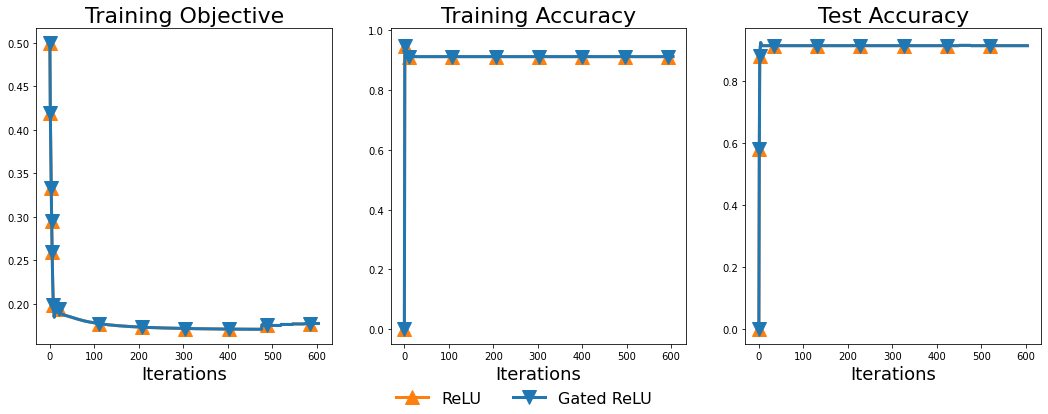

In [10]:
fig = plt.figure(figsize=(18,6))
spec = fig.add_gridspec(ncols=3, nrows=1)
ax0 = fig.add_subplot(spec[0, 0])

ax0.plot(np.arange(len(relu_metrics.objective)), 
         relu_metrics.objective, 
         label="ReLU", 
         color="#ff7f0e",
         marker="^",
         markevery=0.1,
         markersize=14,
         linewidth="3")

ax0.plot(np.arange(len(grelu_metrics.objective)), 
         grelu_metrics.objective, 
         label="Gated ReLU", 
         color="#1f77b4",
         marker="v", 
         markevery=0.1,
         markersize=14,
         linewidth="3"
        )

ax0.set_title("Training Objective", fontsize=22)
ax0.set_xlabel("Iterations", fontsize=18)

ax1 = fig.add_subplot(spec[0, 1])

ax1.plot(np.arange(len(relu_metrics.train_accuracy)), 
         relu_metrics.train_accuracy, 
         label="Relu", 
         color="#ff7f0e",
         marker="^",
         markevery=0.1,
         markersize=14,
         linewidth="3")

ax1.plot(np.arange(len(grelu_metrics.train_accuracy)), 
         grelu_metrics.train_accuracy, 
         label="Gated ReLU", 
         color="#1f77b4",
         marker="v", 
         markevery=0.1,
         markersize=14,
         linewidth="3"
        )

ax1.set_title("Training Accuracy", fontsize=22)
ax1.set_xlabel("Iterations", fontsize=18)

ax2 = fig.add_subplot(spec[0, 2])


ax2.plot(np.arange(len(relu_metrics.test_accuracy)), 
         relu_metrics.test_accuracy, 
         label="Relu", 
         color="#ff7f0e",
         marker="^",
         markevery=0.1,
         markersize=14,
         linewidth="3")

ax2.plot(np.arange(len(grelu_metrics.test_accuracy)), 
         grelu_metrics.test_accuracy, 
         label="Gated ReLU", 
         color="#1f77b4",
         marker="v", 
         markevery=0.1,
         markersize=14,
         linewidth="3"
        )

ax2.set_title("Test Accuracy", fontsize=22)
ax2.set_xlabel("Iterations", fontsize=18)
handles, labels = ax0.get_legend_handles_labels()
legend = fig.legend(
    handles=handles,
    labels=labels,
    loc="lower center",
    borderaxespad=0.1,
    fancybox=False,
    shadow=False,
    ncol=2,
    fontsize=16,
    frameon=False,
)
fig.subplots_adjust(
    bottom=0.15,
)